In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.data_loading import iter_reviews, load_beers_breweries_users
from src.data_processing import add_review_columns
from src.utils import tqdm

In [2]:
rb_beers, rb_breweries, rb_users = load_beers_breweries_users("./data/RateBeer")
print(f'shape of beers dataset : {rb_beers.shape}\nshape of breweries dataset: {rb_breweries.shape}\nshape of users dataset: {rb_users.shape}')

rb_beers = add_review_columns("./data/RateBeer/reviews.txt", rb_beers, by="beer_id")
rb_users = add_review_columns("./data/RateBeer/reviews.txt", rb_users, by="user_id")
print(f'shape of beers dataset : {rb_beers.shape}\nshape of breweries dataset: {rb_breweries.shape}\nshape of users dataset: {rb_users.shape}')

shape of beers dataset : (442081, 14)
shape of breweries dataset: (24189, 4)
shape of users dataset: (70174, 5)


100%|█████████████████████████████████████████████████| 7122074/7122074 [00:37<00:00, 189488.93it/s]


shape of beers dataset : (396690, 16)
shape of breweries dataset: (24189, 4)
shape of users dataset: (70172, 7)


In [3]:
rb_beers

,beer_id,beer_name,brewery_id,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings,location,review_count,avg_overall
0,410549,33 Export (Gabon),3198,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN,Gabon,1,8.000000
1,105273,Castel Beer (Gabon),3198,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN,Gabon,10,6.900000
2,19445,Régab,3198,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN,Gabon,27,6.592593
3,155699,Ards Bally Black Stout,13538,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667,Northern Ireland,6,16.333333
4,239097,Ards Belfast 366,13538,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN,Northern Ireland,1,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396685,189684,Stela Selekt,1107,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN,Albania,5,5.200000
396686,84884,Hotel Martini Donauer,9355,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN,Albania,1,12.000000
396687,93783,Birra Rozafa,9928,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN,Albania,1,8.000000
396688,220897,Svejk Blonde,17155,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN,Albania,4,10.000000


- User data : We drop users with duplicate user ids. The only missing values are locations and join dates, but we don't drop these users as the reviews they wrote are still valuable even if we won't be able to visualize their location for example.

- Beer data : There are no duplicate beer ids. We drop columns with too many missing values and those that are related to reviews, which we will recompute when needed using our data, as we don't know how these columns were computed and they don't always correspond to our data. Note that we keep abv (alchohol by volume) as it will be useful for later analysis.

- Brewery data : There are no duplicate ids and no missing values, so we don't do anything.

##### users dataset

In [4]:
duplicates_idx = rb_users.duplicated(subset='user_id', keep=False)
# save dropped users, so we can ignore their reviews later if needed
#data_path = "./data/RateBeer/ignore_users.csv"
#rb_users[duplicates_idx]["user_id"].to_csv(data_path)

In [5]:
#dropping dupliacte users in rb_users
rb_users = rb_users[~rb_users.duplicated(subset='user_id', keep=False)]
print("Cheking number of missing values in each columns of rb_users:")
rb_users.isnull().sum()

Cheking number of missing values in each columns of rb_users:


nbr_ratings         0
user_id             0
user_name           0
joined             30
location        19575
review_count        0
avg_overall         0
dtype: int64

##### beers dataset

In [6]:
print("number of duplicate beer ids in rb_beers:")
rb_beers[rb_beers.duplicated(subset='beer_id', keep=False)].shape[0]

number of duplicate beer ids in rb_beers:


0

In [7]:
print("number of missing values in each columns of rb_beers:")
rb_beers.isnull().sum()

number of missing values in each columns of rb_beers:


beer_id                           0
beer_name                         0
brewery_id                        0
style                             0
nbr_ratings                       0
overall_score                292662
style_score                  292622
avg                            1043
abv                           36732
avg_computed                      0
zscore                       354462
nbr_matched_valid_ratings         0
avg_matched_valid_ratings    354462
location                          0
review_count                      0
avg_overall                       0
dtype: int64

In [8]:
drop_columns = [
    "overall_score", "style_score", "zscore", "nbr_matched_valid_ratings", "avg_matched_valid_ratings"
]
rb_beers = rb_beers.drop(columns=drop_columns)

##### breweries dataset

In [9]:
print("number of duplicate brewery ids in rb_breweries:")
rb_breweries[rb_breweries.duplicated(subset='id', keep=False)].shape[0]

number of duplicate brewery ids in rb_breweries:


0

In [10]:
print("number of missing values in each columns of rb_breweries:")
rb_breweries.isnull().sum()

number of missing values in each columns of rb_breweries:


id           0
location     0
name         0
nbr_beers    0
dtype: int64

In [11]:
rb_beers.shape, rb_breweries.shape, rb_users.shape

((396690, 11), (24189, 4), (70112, 7))

In [12]:
import os

directory = "./data/RateBeer_processed"
if not os.path.exists(directory):
    os.makedirs(directory)

rb_beers.to_csv("./data/RateBeer_processed/beers.csv", index=False)
rb_breweries.to_csv("./data/RateBeer_processed/breweries.csv", index=False)
rb_users.to_csv("./data/RateBeer_processed/users.csv", index=False)

In [13]:
beers = pd.read_csv("./data/RateBeer_processed/beers.csv")
beers["beer_id"] = beers["beer_id"].astype("string")
beers.shape

(396690, 11)

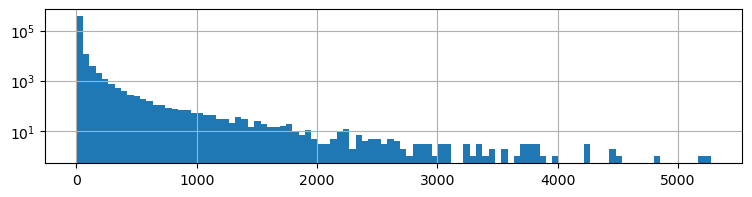

In [14]:
plt.figure(figsize=(9, 2))
beers["review_count"].hist(bins=100)
plt.yscale("log")

In [15]:
popular_beers = beers[beers["review_count"] > 1000]
popular_beers.shape, popular_beers["review_count"].sum() # 566 beers, 1M reviews

((566, 11), 947257)

In [16]:
popular_beers_id = list(popular_beers["beer_id"])

In [17]:
popular_beers_reviews = [r for r in iter_reviews("./data/RateBeer/reviews.txt", do_cast=True)
                         if r["beer_id"] in popular_beers_id]

100%|█████████████████████████████████████████████████| 7122074/7122074 [00:59<00:00, 120043.06it/s]


In [18]:
len(popular_beers_reviews)

947257

In [22]:
import langid

# non-english reviews have encoding issues and unique words that may bias our analysis (eg tf-idf), indicate that
non_english = 0
for review in tqdm(popular_beers_reviews):
    language, _ = langid.classify(review["text"])
    review["language"] = language
    if language != "en":
        non_english += 1

non_english / len(popular_beers_reviews) # ~5% non-english reviews

100%|██████████████████████████████████████████████████████| 947257/947257 [32:10<00:00, 490.74it/s]


0.055327118194956594

In [23]:
reviews = pd.DataFrame(popular_beers_reviews)
reviews.head(2)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,language
0,Tiger Beer,3126,Singapore Brewery (Asia Pacific Breweries-Hein...,547,Pale Lager,5.0,1500112800,lokis333,375455,3.0,6.0,4.0,7.0,12.0,3.2,Golden color with medium white foam. Aromas of...,en
1,Tiger Beer,3126,Singapore Brewery (Asia Pacific Breweries-Hein...,547,Pale Lager,5.0,1500026400,sebsky,478504,3.0,2.0,2.0,3.0,6.0,1.6,"640 ml bottle @home,bb 31/05/2018.Golden,clear...",en


In [24]:
reviews.to_csv("./data/RateBeer_processed/popular_beers_reviews.csv", index=False)

<Axes: >

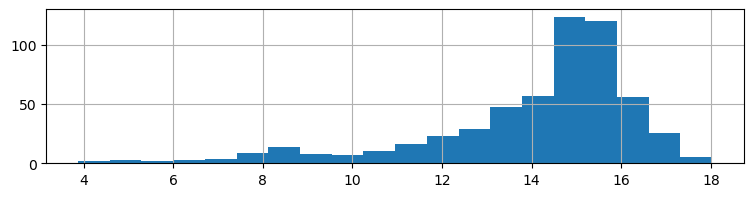

In [25]:
plt.figure(figsize=(9, 2))
reviews.groupby("beer_name")["overall"].mean().hist(bins=20)